In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn.model_selection import StratifiedKFold
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

C:\Users\usuario\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
def clasificador_x(clasificador):
    total=[]
    suma_todos=[]
    y_todos=[]
    skf = StratifiedKFold(n_splits=10, shuffle=True)
    skf.get_n_splits(X, y)
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        #Clasificador#####################################
        y_pred = clasificador.fit(X_train, y_train).predict(X_test)
        ##################################################
        con=0;
        z=0;
        for i in y_test:
            suma_todos.append(y_pred[con])
            if i == y_pred[con]:
                z=z+1;
            con=con+1;
        y_list = y_test.tolist()
        y_todos.append(y_list)
        des = z/len(y_test)*100
        total.append(des)
        print("Desempeño por fold: " +str(des))
    results = [] 
    for sublist in y_todos: 
        for element in sublist: 
         results += str(element) 
    results = list(map(int, results))    
    print("\nDesempeño total: " + str(sum(total)/10))
    print(__doc__)
    class_names = ['setosa', 'versicolor', 'virginica']
    def plot_confusion_matrix(cm, classes,
                              normalize=False,
                              title='Confusion matrix',
                              cmap=plt.cm.Blues):
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')
        print(cm)
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)
        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.tight_layout()
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(results, suma_todos)
    np.set_printoptions(precision=2)
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion matrix, without normalization')
    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                          title='Normalized confusion matrix')
    plt.show()

In [3]:
excel_file = 'Iris.xls'
datos = pd.read_excel(excel_file, sheet_name = "Hoja1")
datos_data = datos.drop("Clase",1)
datos_data_array = datos_data.values
datos_target = datos["Clase"]
datos_target_array = datos_target.values
X, y = datos_data_array, datos_target_array

# NAIVE BAYES CON 10-FOLD CROSS VALIDATION STRATIFIED


Desempeño por fold: 100.0
Desempeño por fold: 100.0
Desempeño por fold: 100.0
Desempeño por fold: 100.0
Desempeño por fold: 80.0
Desempeño por fold: 93.33333333333333
Desempeño por fold: 93.33333333333333
Desempeño por fold: 100.0
Desempeño por fold: 93.33333333333333
Desempeño por fold: 93.33333333333333

Desempeño total: 95.33333333333334
Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[50  0  0]
 [ 0 47  3]
 [ 0  4 46]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.94 0.06]
 [0.   0.08 0.92]]


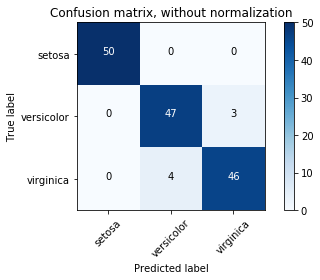

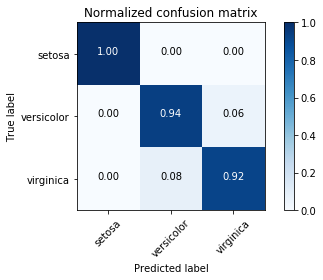

In [4]:
clasificador = GaussianNB()
clasificador_x(clasificador)

# DECISION TREE - 10-FOLD CROSS VALIDATION STRATIFIED


Desempeño por fold: 93.33333333333333
Desempeño por fold: 93.33333333333333
Desempeño por fold: 100.0
Desempeño por fold: 100.0
Desempeño por fold: 93.33333333333333
Desempeño por fold: 86.66666666666667
Desempeño por fold: 100.0
Desempeño por fold: 93.33333333333333
Desempeño por fold: 93.33333333333333
Desempeño por fold: 100.0

Desempeño total: 95.33333333333334
Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[50  0  0]
 [ 0 46  4]
 [ 0  3 47]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.92 0.08]
 [0.   0.06 0.94]]


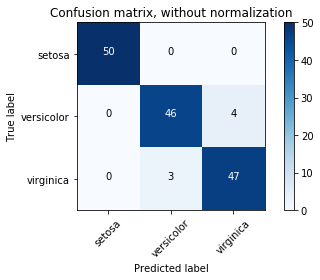

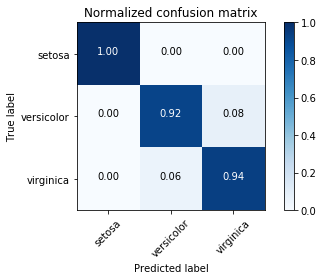

In [5]:
clasificador = DecisionTreeClassifier(random_state=0)
clasificador_x(clasificador)

## RANDOM FOREST - 10-FOLD CROSS VALIDATION STRATIFIED


Desempeño por fold: 93.33333333333333
Desempeño por fold: 93.33333333333333
Desempeño por fold: 100.0
Desempeño por fold: 93.33333333333333
Desempeño por fold: 86.66666666666667
Desempeño por fold: 100.0
Desempeño por fold: 93.33333333333333
Desempeño por fold: 80.0
Desempeño por fold: 100.0
Desempeño por fold: 100.0

Desempeño total: 94.0
Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[50  0  0]
 [ 0 47  3]
 [ 0  6 44]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.94 0.06]
 [0.   0.12 0.88]]


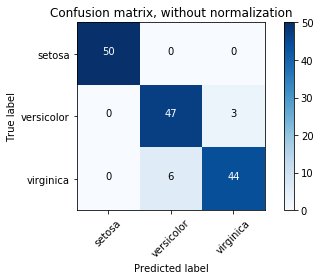

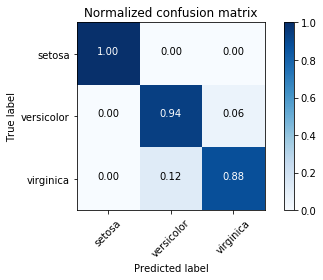

In [6]:
clasificador = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clasificador_x(clasificador)

## SVM - 10-Fold Cross Validation

Desempeño por fold: 93.33333333333333
Desempeño por fold: 80.0
Desempeño por fold: 93.33333333333333
Desempeño por fold: 100.0
Desempeño por fold: 93.33333333333333
Desempeño por fold: 93.33333333333333
Desempeño por fold: 100.0
Desempeño por fold: 100.0
Desempeño por fold: 93.33333333333333
Desempeño por fold: 93.33333333333333

Desempeño total: 94.0
Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[50  0  0]
 [ 0 47  3]
 [ 0  6 44]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.94 0.06]
 [0.   0.12 0.88]]


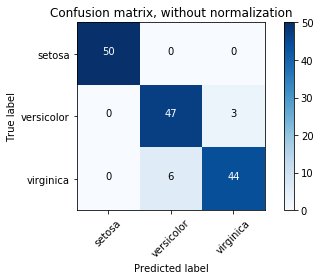

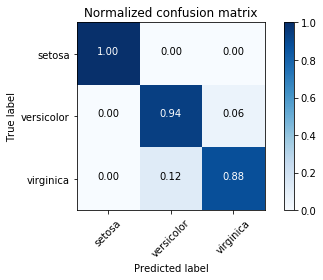

In [7]:
clasificador = SVC(kernel="linear", C=0.025)
clasificador_x(clasificador)

## SVM - 10-Fold Cross Validation

Desempeño por fold: 93.33333333333333
Desempeño por fold: 100.0
Desempeño por fold: 93.33333333333333
Desempeño por fold: 100.0
Desempeño por fold: 100.0
Desempeño por fold: 100.0
Desempeño por fold: 100.0
Desempeño por fold: 93.33333333333333
Desempeño por fold: 86.66666666666667
Desempeño por fold: 100.0

Desempeño total: 96.66666666666666
Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[50  0  0]
 [ 0 46  4]
 [ 0  1 49]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.92 0.08]
 [0.   0.02 0.98]]


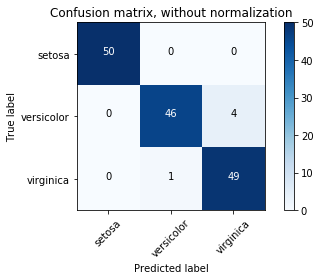

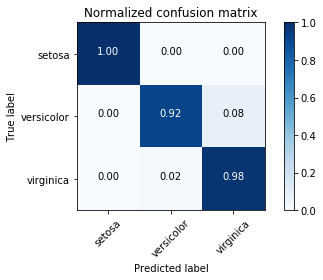

In [8]:
clasificador = SVC(gamma=2, C=1)
clasificador_x(clasificador)

## kNN - 10-FOLD CROSS VALIDATION STRATIFIED

Desempeño por fold: 86.66666666666667
Desempeño por fold: 100.0
Desempeño por fold: 100.0
Desempeño por fold: 100.0
Desempeño por fold: 93.33333333333333
Desempeño por fold: 93.33333333333333
Desempeño por fold: 93.33333333333333
Desempeño por fold: 100.0
Desempeño por fold: 100.0
Desempeño por fold: 100.0

Desempeño total: 96.66666666666667
Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.94 0.06]
 [0.   0.04 0.96]]


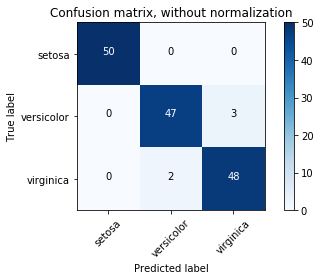

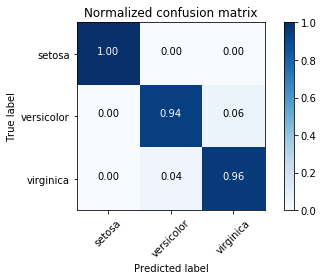

In [9]:
clasificador = KNeighborsClassifier(3)
clasificador_x(clasificador)

## GAUSSIAN PROCESS CLASSIFIER - 10-FOLD CROSS VALIDATION STRATIFIED

Desempeño por fold: 100.0
Desempeño por fold: 93.33333333333333
Desempeño por fold: 100.0
Desempeño por fold: 93.33333333333333
Desempeño por fold: 100.0
Desempeño por fold: 100.0
Desempeño por fold: 86.66666666666667
Desempeño por fold: 100.0
Desempeño por fold: 100.0
Desempeño por fold: 93.33333333333333

Desempeño total: 96.66666666666666
Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[50  0  0]
 [ 0 46  4]
 [ 0  1 49]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.92 0.08]
 [0.   0.02 0.98]]


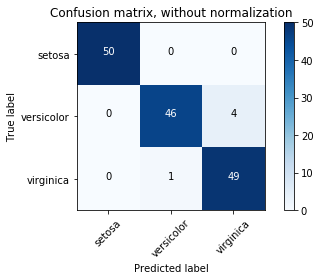

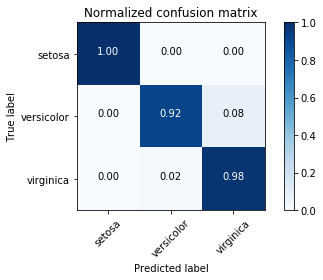

In [10]:
clasificador = GaussianProcessClassifier(1.0 * RBF(1.0))
clasificador_x(clasificador)    


## MLP CLASSIFIER - 10-FOLD CROSS VALIDATION STRATIFIED

C:\Users\usuario\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Desempeño por fold: 100.0
Desempeño por fold: 100.0
Desempeño por fold: 100.0
Desempeño por fold: 86.66666666666667
Desempeño por fold: 100.0
Desempeño por fold: 86.66666666666667
Desempeño por fold: 100.0
Desempeño por fold: 100.0
Desempeño por fold: 100.0
Desempeño por fold: 100.0

Desempeño total: 97.33333333333334
Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[50  0  0]
 [ 0 46  4]
 [ 0  0 50]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.92 0.08]
 [0.   0.   1.  ]]


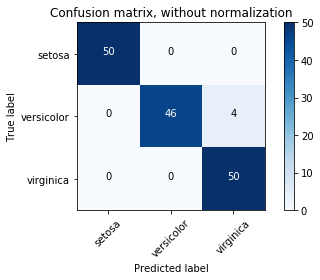

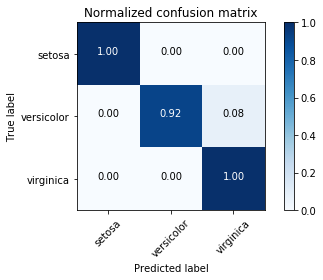

In [11]:
clasificador =MLPClassifier(alpha=1)
clasificador_x(clasificador)    

## ADA BOOST CLASSIFIER - 10-FOLD CROSS VALIDATION STRATIFIED

Desempeño por fold: 86.66666666666667
Desempeño por fold: 100.0
Desempeño por fold: 86.66666666666667
Desempeño por fold: 93.33333333333333
Desempeño por fold: 93.33333333333333
Desempeño por fold: 93.33333333333333
Desempeño por fold: 93.33333333333333
Desempeño por fold: 100.0
Desempeño por fold: 93.33333333333333
Desempeño por fold: 100.0

Desempeño total: 94.00000000000001
Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[50  0  0]
 [ 0 47  3]
 [ 0  6 44]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.94 0.06]
 [0.   0.12 0.88]]


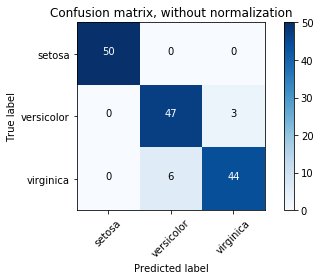

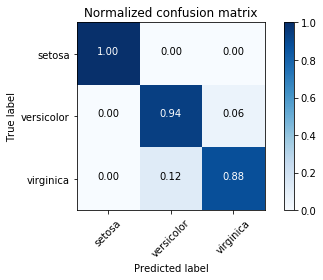

In [12]:
clasificador = AdaBoostClassifier()
clasificador_x(clasificador)  
